# LatLonProfiles diagnostic

The aim of this diagnostic is to visualise latitudinal or longitudinal profiles of a certain variable. In addition, plots are allowed to have multiple lines and/or show the seasonal and annual means of the selected variable.


In [1]:
%reload_ext autoreload
%autoreload 2

Let's start with the import of the classes `LatLonProfiles` and `PlotLatLonProfiles`:

In [2]:
from aqua.diagnostics.lat_lon_profiles import LatLonProfiles
from aqua.diagnostics.lat_lon_profiles import PlotLatLonProfiles

/LUMI_TYKKY_KrYnNEo/miniconda/envs/env1/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


We generate a dictionary, `dataset_dict`, including the data we want to plot in this notebook.
The plot of a reference profile to be plotted along with the input dataset is optional. If chosen, `obs_dict` is necessary. 
Lastly, `common_dict` include the common features for both datasets (input and reference).

In [3]:
dataset_dict = {'catalog': 'climatedt-phase1',
                'model': 'ICON',
                'exp': 'historical-1990',
                'source': 'lra-r100-monthly'}
obs_dict = {'catalog': 'obs',
            'model': 'ERA5',
            'exp': 'era5',
            'source': 'monthly',
            'std_startdate': '1990-01-01',
            'std_enddate': '1999-12-31'}
common_dict = {'startdate': '1990-01-01',
               'enddate': '1999-12-31',
               'loglevel': 'info'}

We hence generate an object of the `LatLonProfiles` class, and we decide to plot a zonal profile as an example. This means that the code will be performing the zonal mean, by averaging across the longitudes. 

The analysed variable for this notebook will be `tprate` (Total Precipitation Rate, expressed in mm/day).

By default, the `mean_type` parameter in set as 'zonal' (so the profile will be zonal even without a specific `mean_type` setting), but to visualise the meridional profile, one can just set it to 'meridional'. We also generate another LatLonProfiles object for the reference zonal profile.

In [4]:
lonlat_dataset = LatLonProfiles(**dataset_dict, **common_dict, mean_type='zonal')
lonlat_obs = LatLonProfiles(**obs_dict, **common_dict, mean_type='zonal')

run_dict = {'var': 'tprate',
            'units': 'mm/day'}

lonlat_dataset.run(**run_dict, std=True)
lonlat_obs.run(**run_dict, std=True)

2025-08-17 12:47:55 :: LatLonProfiles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2025-08-17 12:47:55 :: LatLonProfiles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2025-08-17 12:47:55 :: LatLonProfiles :: INFO     -> Running LatLonProfiles for tprate


2025-08-17 12:47:56 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-08-17 12:47:56 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-08-17 12:47:56 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-08-17 12:47:56 :: Fixer :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-08-17 12:47:56 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-08-17 12:47:56 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-08-17 12:47:56 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-08-17 12:48:14 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-08-17 12:48:14 :: Regridder :: INFO     -> Using provided dataset as a grid path for 2d
2025-08-17 12:48:14 :: Regridder :: INFO     -> Grid name: lon-lat
2025-08-17 12:48:14 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep

Different types of dataset can be managed and plotted via `LatLonProfiles` and `PlotLatLonProfiles`: 
- Single timesteps taken from the input dataset, with the time frequency of choice
- Seasonal mean, with season choice between DJF, MAM, JJA and SON
- Annual mean

Let us start with a single line plot using a single timestep (with reference)

## Single profile
### Single plot - single timestep

We use the `.run()` method of the `LatLonProfiles` class to first select a single timestep of the input dataset, for example the July 1995 month. We perform the same computation with the reference data and we use the `PlotLatLonProfiles` class to plot the ICON July 1995 profile along with the ERA5 reference data for the same month:

In [5]:
"""
lonlat_july_1995 = lonlat_dataset.select_timestep('1995-07')
lonlat_obs_july_1995 = lonlat_obs.select_timestep('1995-07')

single_timestep_plot = PlotLatLonProfiles(
    data=[lonlat_dataset.direct_profile],
    ref_data=lonlat_obs.direct_profile,
    loglevel='INFO'
)

fig_single_timestep, _ = single_timestep_plot.plot_lat_lon_profiles(
    data_labels=single_timestep_plot.set_data_labels(),
    ref_label=single_timestep_plot.set_ref_label(),
    title="Total Precipitation Rate Profile - July 1995"
)

single_timestep_plot.save_plot(
    fig=fig_single_timestep, 
    var='tprate', 
    description="Total Precipitation Rate profile for July 1995"
)
"""

'\nlonlat_july_1995 = lonlat_dataset.select_timestep(\'1995-07\')\nlonlat_obs_july_1995 = lonlat_obs.select_timestep(\'1995-07\')\n\nsingle_timestep_plot = PlotLatLonProfiles(\n    data=[lonlat_dataset.direct_profile],\n    ref_data=lonlat_obs.direct_profile,\n    loglevel=\'INFO\'\n)\n\nfig_single_timestep, _ = single_timestep_plot.plot_lat_lon_profiles(\n    data_labels=single_timestep_plot.set_data_labels(),\n    ref_label=single_timestep_plot.set_ref_label(),\n    title="Total Precipitation Rate Profile - July 1995"\n)\n\nsingle_timestep_plot.save_plot(\n    fig=fig_single_timestep, \n    var=\'tprate\', \n    description="Total Precipitation Rate profile for July 1995"\n)\n'

### Single plot - seasonal mean
We can choose to select a specific season from `lonlat_dataset.seasonal` (which contains [DJF, MAM, JJA, SON]) or use the annual mean from `lonlat_dataset.annual`.

Standard deviation shading implementation is possible (and optional) for both the model and the reference data. In this case, we choose 
to plot the std shading only for the reference data, showing how to possibly implement it for the model data via `std_data`.

The seasonal data is a list with 4 elements:
- Index 0: DJF (December-January-February)  
- Index 1: MAM (March-April-May)
- Index 2: JJA (June-July-August)
- Index 3: SON (September-October-November)

In [6]:
# Seasonal data example:
single_season = lonlat_dataset.seasonal[0]  # DJF (winter)
single_season_obs = lonlat_obs.seasonal[0]  # DJF (winter) for reference

# Annual data example:
# single_annual = lonlat_dataset.annual
# single_annual_obs = lonlat_obs.annual

data_to_use = single_season
ref_data_to_use = single_season_obs

plot_dict = {'data': [data_to_use],  # Note: needs to be a list
             'ref_data': ref_data_to_use,  # Reference data
             #'std_data': lonlat_dataset.std_seasonal[0],  # DJF std for model data
             'ref_std_data': lonlat_obs.std_seasonal[0],  # DJF std for reference data
             'loglevel': 'INFO'}

We here plot the single profile, retrieve the plot labels and info via the metadata. Lastly, we save the plot:

2025-08-17 12:49:09 :: create_folder :: INFO     -> Folder ./png already exists
2025-08-17 12:49:10 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles.climatedt-phase1.ICON.historical-1990.r1.tprate.png
2025-08-17 12:49:10 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles.climatedt-phase1.ICON.historical-1990.r1.tprate.png


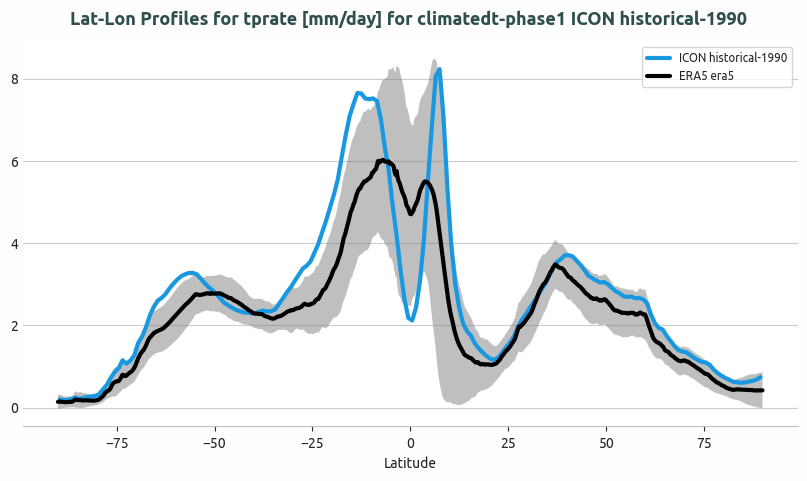

In [7]:
plot = PlotLatLonProfiles(**plot_dict)
data_labels = plot.set_data_labels()
ref_labels = plot.set_ref_label()
desc = plot.set_description()
title = plot.set_title(var=run_dict['var'], units=run_dict['units'])
fig, _ = plot.plot_lat_lon_profiles(data_labels=data_labels, ref_label=ref_labels, title=title)
plot.save_plot(fig=fig, var=run_dict['var'], description=desc)

### Signle plot - annual mean profile

Lastly, with the same logic we plot the annual mean for the `lonlat_dataset` object along with the reference data:

2025-08-17 12:49:30 :: create_folder :: INFO     -> Folder ./png already exists
2025-08-17 12:49:30 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles_annual.climatedt-phase1.ICON.historical-1990.r1.tprate.png
2025-08-17 12:49:30 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles_annual.climatedt-phase1.ICON.historical-1990.r1.tprate.png


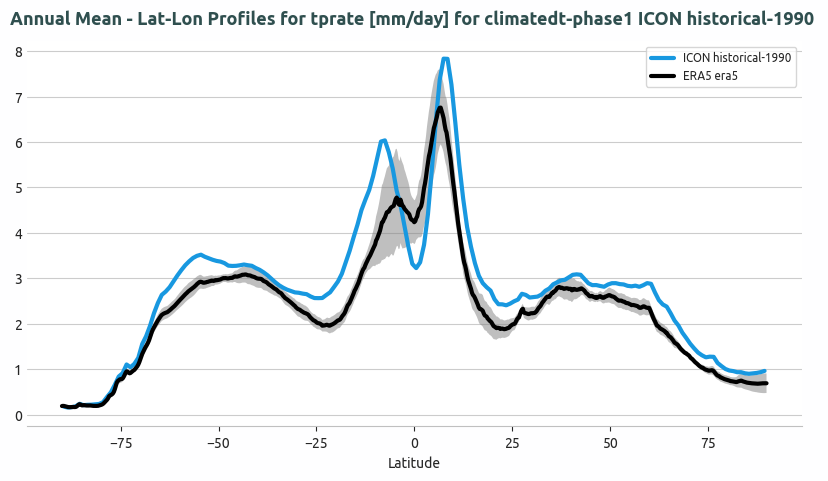

In [8]:
# Create a separate annual mean plot
annual_plot = PlotLatLonProfiles(
    data=[lonlat_dataset.annual],            # Annual data
    ref_data=lonlat_obs.annual,              # Annual reference data
    #std_data=lonlat_dataset.std_annual,      # Annual std for model data
    ref_std_data=lonlat_obs.std_annual,      # Annual std for reference data
    loglevel='INFO'
)

# Set labels and title for annual plot
annual_data_labels = annual_plot.set_data_labels()
annual_ref_label = annual_plot.set_ref_label()
annual_title = f"Annual Mean - {annual_plot.set_title(var=run_dict['var'], units=run_dict['units'])}"
annual_description = annual_plot.set_description()

# Plot and save annual mean
fig_annual, _ = annual_plot.plot_lat_lon_profiles(
    data_labels=annual_data_labels, 
    ref_label=annual_ref_label, 
    title=annual_title
)
annual_plot.save_plot(
    fig=fig_annual, 
    var=run_dict['var'], 
    description=annual_description,
    diagnostic='lat_lon_profiles_annual'
)

### Seasonal means profiles

Via `PlotLatLonProfiles` we can also show the 4 seasons means represented in four subplots. In case of std shading to be plotted also for model data, `std_data` can be added (hereby commented).

2025-08-17 12:49:30 :: PlotLatLonProfiles :: INFO     -> Running PlotLatLonProfiles


2025-08-17 12:50:22 :: create_folder :: INFO     -> Folder ./png already exists
2025-08-17 12:50:23 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles_seasonal.climatedt-phase1.ICON.historical-1990.r1.tprate.png
2025-08-17 12:50:23 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles_seasonal.climatedt-phase1.ICON.historical-1990.r1.tprate.png
2025-08-17 12:50:23 :: PlotLatLonProfiles :: INFO     -> PlotLatLonProfiles completed successfully


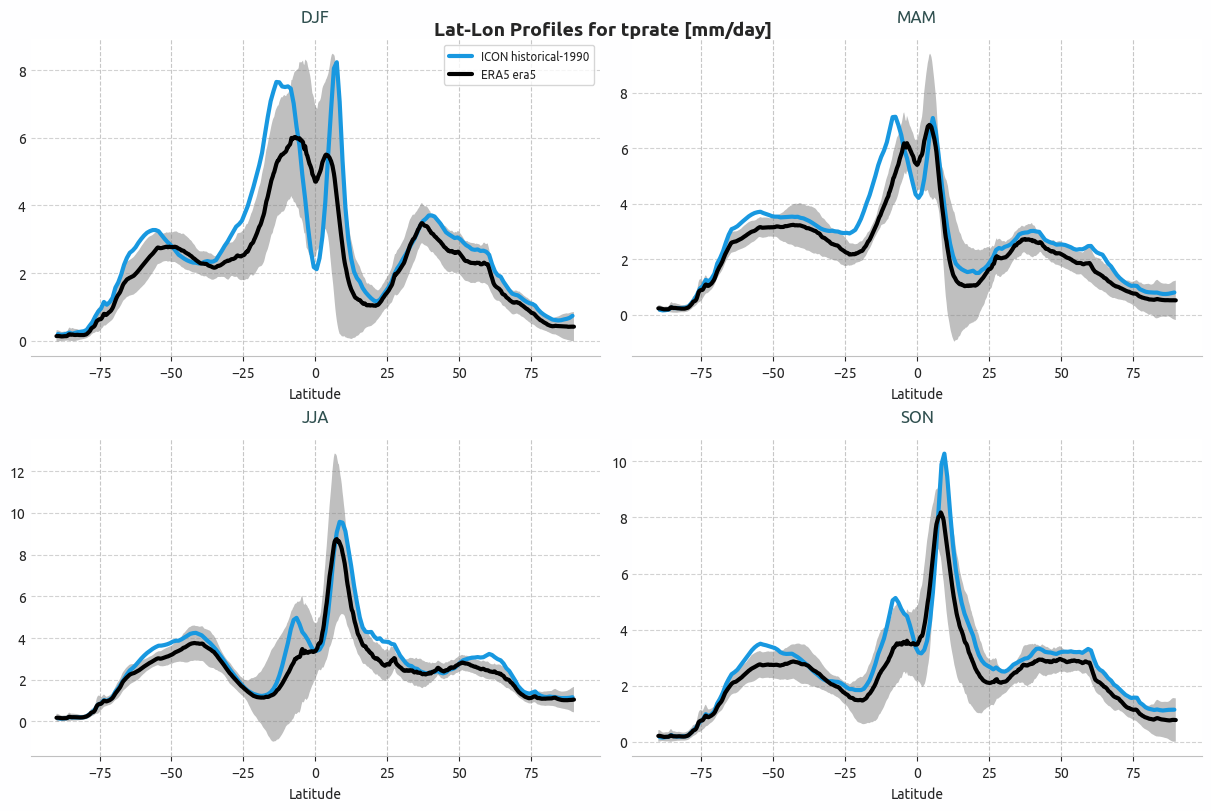

In [9]:
combined_seasonal_model_data = []
combined_seasonal_ref_data = []

for i in range(4):  # DJF, MAM, JJA, SON
    combined_seasonal_model_data.append([lonlat_dataset.seasonal[i]])  # Model data as list
    combined_seasonal_ref_data.append(lonlat_obs.seasonal[i])          # Reference data

# Prepare std data for all 4 seasons
std_maps = [lonlat_dataset.std_seasonal[i] for i in range(4)]  # DJF, MAM, JJA, SON std
ref_std_maps = [lonlat_obs.std_seasonal[i] for i in range(4)]  # Reference std for all seasons

seasonal_plot = PlotLatLonProfiles(
    seasonal_annual_data=combined_seasonal_model_data, 
    seasonal_annual_ref_data=combined_seasonal_ref_data,
    loglevel='INFO'
)
seasonal_plot.run(
    var=run_dict['var'], 
    units=run_dict['units'], 
    plot_type='seasonal',
    #std_maps=std_maps,
    ref_std_maps=ref_std_maps
)

## Multi-line profiles

We now increase the number of lines which can be plotted on the same plot.

We just run the code with a new variable from the same dataset and we choose `t` which, compared with `2t`, includes multiple pressure levels.

In [10]:
lonlat_dataset_2 = LatLonProfiles(**dataset_dict, **common_dict)

run_dict_2 = {'var': 't',  # Atmospheric temperature on pressure levels
              'units': 'degC'}

lonlat_dataset_2.run(**run_dict_2)

2025-08-17 12:50:23 :: LatLonProfiles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2025-08-17 12:50:23 :: LatLonProfiles :: INFO     -> Running LatLonProfiles for t
2025-08-17 12:50:24 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!


2025-08-17 12:50:24 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-08-17 12:50:24 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-08-17 12:50:24 :: Fixer :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-08-17 12:50:24 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-08-17 12:50:24 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-08-17 12:50:24 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-08-17 12:50:39 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-08-17 12:50:39 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-08-17 12:50:39 :: Regridder :: INFO     -> Using provided dataset as a grid path for 2d
2025-08-17 12:50:39 :: Regridder :: INFO     -> Grid name: lon-lat
2025-08-17 12:50:39 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/are

Ash such, we use the `multi_line_plot` object to plot more line on the same graph, and we select the pressure levels 1000, 850 and 700 hPa. We can also customise the legend data labels and title, as shown here:

### Single plot - single timestep

In [ ]:
"""
july_1995_atmospheric = lonlat_dataset_2.select_timestep('1995-07')

multi_timestep_plot = PlotLatLonProfiles(
    data=[lonlat_july_1995,                                     # Surface temp (2t)
          july_1995_atmospheric.sel(plev=100000),               # 1000 hPa temp (t)
          july_1995_atmospheric.sel(plev=85000),                # 850 hPa temp (t)
          july_1995_atmospheric.sel(plev=70000)],               # 700 hPa temp (t)
    ref_data=lonlat_obs_july_1995,                              # Reference for 2t
    loglevel='INFO'
)

# Define custom labels per il timestep specifico
timestep_labels = [
    f"Surface Temperature ({run_dict['var']}) - July 1995", 
    f"1000 hPa Temperature ({run_dict_2['var']}) - July 1995",
    f"850 hPa Temperature ({run_dict_2['var']}) - July 1995",
    f"700 hPa Temperature ({run_dict_2['var']}) - July 1995"
]

ref_label = multi_timestep_plot.set_ref_label()
title = "July 1995 Temperature Comparison: Surface vs Multiple Atmospheric Levels"

# Plot multi-line per timestep specifico
fig_multi_timestep, _ = multi_timestep_plot.plot_multi_line_profiles(
    data_labels=timestep_labels, 
    ref_label=ref_label, 
    title=title
)

multi_timestep_plot.save_plot(
    fig=fig_multi_timestep, 
    var="multi_temp_levels_july1995", 
    description="July 1995 temperature comparison across multiple atmospheric levels"
)
"""

2025-08-17 12:50:56 :: LatLonProfiles :: INFO     -> Selecting timestep: 1995-07
2025-08-17 12:50:56 :: LatLonProfiles :: INFO     -> Computing direct profile for timestep: 1995-07
2025-08-17 12:50:56 :: FldStat :: INFO     -> Computing area-weighted mean on ['lon'] dimensions


NameError: name 'lonlat_july_1995' is not defined

2025-08-17 12:52:04 :: create_folder :: INFO     -> Folder ./png already exists
2025-08-17 12:52:04 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles.climatedt-phase1.ICON.historical-1990.r1.multi_temp_levels.png
2025-08-17 12:52:04 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles.climatedt-phase1.ICON.historical-1990.r1.multi_temp_levels.png


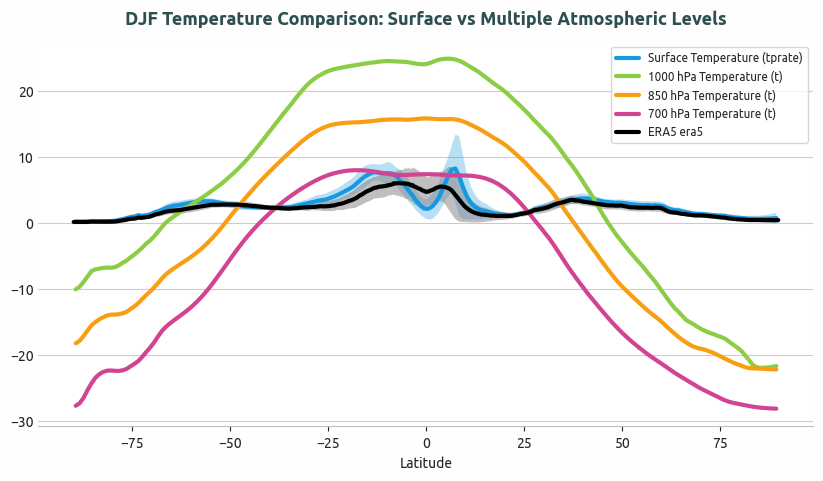

In [12]:
# Use seasonal data (DJF - winter as example)
multi_line_plot = PlotLatLonProfiles(
    data=[lonlat_dataset.seasonal[0],                           # DJF surface temp
          lonlat_dataset_2.seasonal[0].sel(plev=100000),        # DJF 1000 hPa temp
          lonlat_dataset_2.seasonal[0].sel(plev=85000),         # DJF 850 hPa temp
          lonlat_dataset_2.seasonal[0].sel(plev=70000)],        # DJF 700 hPa temp
    ref_data=lonlat_obs.seasonal[0],  # Reference surface temperature for DJF
    std_data=[lonlat_dataset.std_seasonal[0], None, None, None],  # Only surface temp has std data
    ref_std_data=lonlat_obs.std_seasonal[0],  # DJF std for reference surface temp
    loglevel='INFO'
)

data_labels = [f"Surface Temperature ({run_dict['var']})", 
               f"1000 hPa Temperature ({run_dict_2['var']})",
               f"850 hPa Temperature ({run_dict_2['var']})",
               f"700 hPa Temperature ({run_dict_2['var']})"]
ref_label = multi_line_plot.set_ref_label()
title = "DJF Temperature Comparison: Surface vs Multiple Atmospheric Levels"
fig, ax = multi_line_plot.plot_multi_line_profiles(data_labels=data_labels, ref_label=ref_label, title=title)
multi_line_plot.save_plot(fig=fig, var="multi_temp_levels", description="DJF temperature comparison across multiple atmospheric levels")

We hence use again the PlotLatLonProfiles class to finalise the plot, starting from the annual means and concluding with the seasonal means.

### Annual mean profile

We define the labels for each line, and we combine them with the reference line and its label:

2025-08-17 12:52:32 :: create_folder :: INFO     -> Folder ./png already exists
2025-08-17 12:52:33 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles_annual_multi.climatedt-phase1.ICON.historical-1990.r1.multi_temp_levels_annual.png
2025-08-17 12:52:33 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles_annual_multi.climatedt-phase1.ICON.historical-1990.r1.multi_temp_levels_annual.png


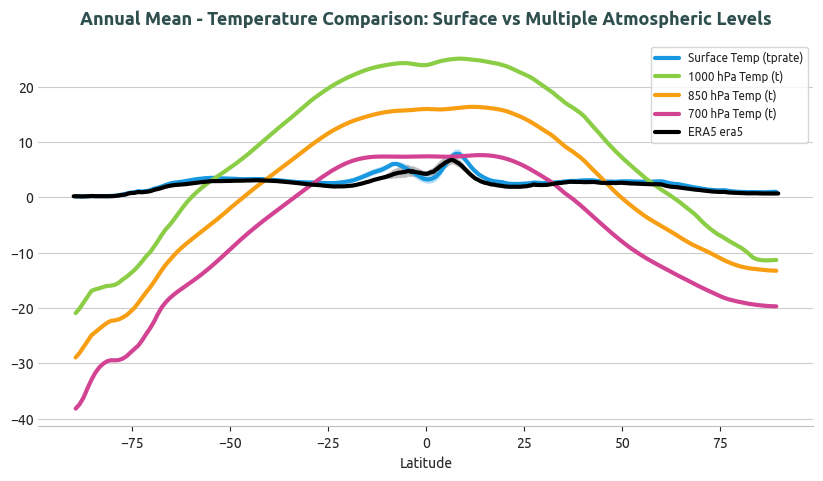

In [13]:
# Define the custom labels for multiple variables first
multi_var_labels = [
    f"Surface Temp ({run_dict['var']})", 
    f"1000 hPa Temp ({run_dict_2['var']})",
    f"850 hPa Temp ({run_dict_2['var']})",
    f"700 hPa Temp ({run_dict_2['var']})"
]

# Create separate annual plot for multi-variables
annual_multi_data = [
    lonlat_dataset.annual,                        # Annual Surface temp
    lonlat_dataset_2.annual.sel(plev=100000),     # Annual 1000 hPa
    lonlat_dataset_2.annual.sel(plev=85000),      # Annual 850 hPa  
    lonlat_dataset_2.annual.sel(plev=70000),      # Annual 700 hPa
]

annual_multi_plot = PlotLatLonProfiles(
    data=annual_multi_data,
    ref_data=lonlat_obs.annual,
    std_data=[lonlat_dataset.std_annual, None, None, None],  # Only surface temp has std data
    ref_std_data=lonlat_obs.std_annual,  # Annual std for reference surface temp
    loglevel='INFO'
)

# Plot with custom labels and title
fig_annual_multi, _ = annual_multi_plot.plot_multi_line_profiles(
    data_labels=multi_var_labels,
    ref_label=annual_multi_plot.set_ref_label(),
    title="Annual Mean - Temperature Comparison: Surface vs Multiple Atmospheric Levels"
)

annual_multi_plot.save_plot(
    fig=fig_annual_multi,
    var="multi_temp_levels_annual",
    description="Annual mean temperature comparison across multiple atmospheric levels",
    diagnostic='lat_lon_profiles_annual_multi'
)

### Seasonal mean profiles

As for the annual mean plot, same logic applies also for seasonal profiles:

2025-08-17 12:52:33 :: PlotLatLonProfiles :: INFO     -> Running PlotLatLonProfiles


2025-08-17 12:53:51 :: create_folder :: INFO     -> Folder ./png already exists
2025-08-17 12:53:53 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/lat_lon_profiles.lat_lon_profiles_seasonal.climatedt-phase1.ICON.historical-1990.r1.multi_temp_levels.png
2025-08-17 12:53:53 :: OutputSaver :: INFO     -> Saved PNG: ./png/lat_lon_profiles.lat_lon_profiles_seasonal.climatedt-phase1.ICON.historical-1990.r1.multi_temp_levels.png
2025-08-17 12:53:53 :: PlotLatLonProfiles :: INFO     -> PlotLatLonProfiles completed successfully


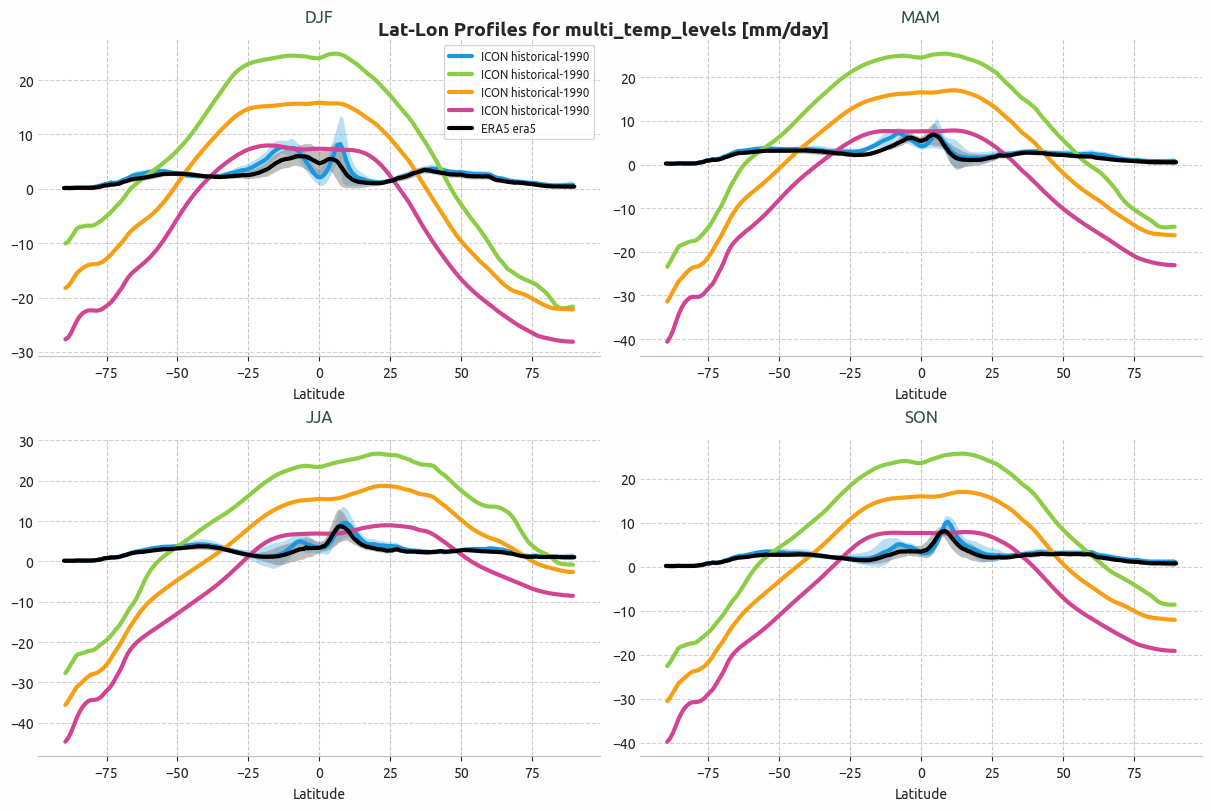

In [14]:
# Prepare model data for 4 seasons
combined_seasonal_model_data = []
combined_seasonal_ref_data = []

for i in range(4):  # DJF, MAM, JJA, SON
    combined_seasonal_model_data.append([
        lonlat_dataset.seasonal[i],                       # Model data 1 (Surface)
        lonlat_dataset_2.seasonal[i].sel(plev=100000),    # Model data 2 (1000 hPa)
        lonlat_dataset_2.seasonal[i].sel(plev=85000),     # Model data 3 (850 hPa)
        lonlat_dataset_2.seasonal[i].sel(plev=70000),     # Model data 4 (700 hPa)
    ])
    combined_seasonal_ref_data.append(lonlat_obs.seasonal[i])

# Prepare std data for multi-line seasonal plots (only surface temp has std)
multi_std_maps = [[lonlat_dataset.std_seasonal[i], None, None, None] for i in range(4)]
multi_ref_std_maps = [lonlat_obs.std_seasonal[i] for i in range(4)]

# Create 4-panel seasonal plot with multiple variables
seasonal_multi_plot = PlotLatLonProfiles(
    seasonal_annual_data=combined_seasonal_model_data, 
    seasonal_annual_ref_data=combined_seasonal_ref_data,
    loglevel='INFO'
)

# Run the seasonal plot (multi_var_labels is already defined in the previous cell)
seasonal_multi_plot.run(
    var="multi_temp_levels", 
    units=run_dict['units'],
    plot_type='seasonal',
    std_maps=multi_std_maps,
    ref_std_maps=multi_ref_std_maps
)